### **Task 2 : Plotting Data**

**Referred Articles and Documentations**

* https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

* This article really helped me choose which type of plots should I choose and why it will be the most optimal choice as per me.

* Referred from the link, thanks to jbofill10
 https://github.com/jbofill10/C1_Transaction_Data/blob/master/Visualizations.ipynb for such an amazing work.

* Co-incidently the graphs are same but are the right choices for plotting the data.

* The graphs which I have referred from him directly I have give the credits.

* I am grateful it saved the time to implemen(code reusability) and I could focus on finding underlying relationships of the data.

In [9]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_json("transactions.txt", lines=True)

In [11]:
# axis = 0 rows
# axis = 1 columns 
df.drop(['merchantState',	'merchantZip', 'echoBuffer', 'posOnPremises','recurringAuthInd' ],axis = 1 , inplace = True)

In [12]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,merchantCity,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,,True,False,False


**Plotting Graph for statistics of each field**

<Figure size 432x288 with 0 Axes>

<Figure size 400x400 with 0 Axes>

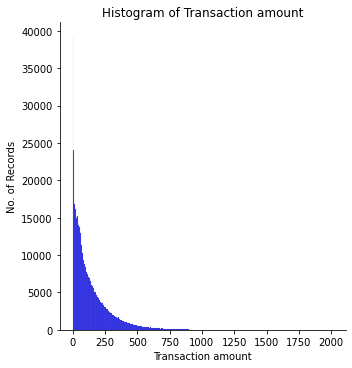

<Figure size 400x400 with 0 Axes>

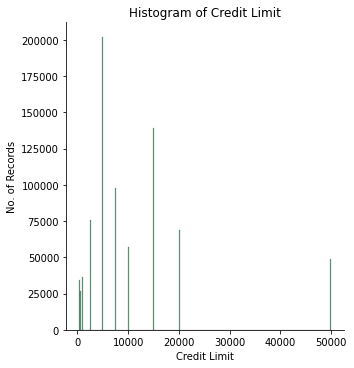

<Figure size 400x400 with 0 Axes>

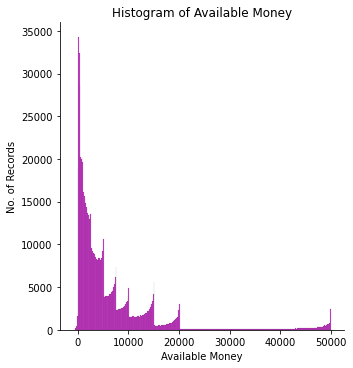

<Figure size 400x400 with 0 Axes>

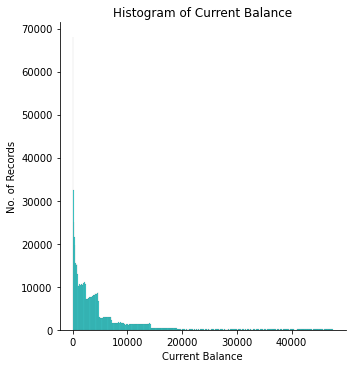

In [13]:
plt.suptitle('Statistical Data Distribution', fontsize=22)

plt.suptitle('Numerical Data Distribution', fontsize=22)
data = ['transactionAmount','creditLimit','availableMoney','currentBalance']
x_labels = ['Transaction amount','Credit Limit','Available Money','Current Balance', ]
colors = ['b', 'seagreen', 'm', 'c']
for i in range(0,len(data)):
    plt.figure(figsize=(5,5), dpi= 80)
    sns.displot(df[data[i]],color = colors[i])
    plt.xlabel(x_labels[i])
    plt.ylabel('No. of Records')
    plt.title('Histogram of ' + x_labels[i])

## **Observations on Graphs**


**Transaction Amount**

* People don't much seem to use the credit card as most of the transactions are 0 and as we go the number gradually increases.

* It's surprising to see even though people have high credit limit the maximum transaction value is < $1000.

* I can conclude 2 possibilities from this:

 1. Considering this is the cost of 1 transaction, poeple spend between 0 - $250 like going to buy groceries from Costco.

 2. Or paying there bills using the card. 

**Credit Limit**

* There is a range of credit limit 0 - $50,000. 

* We can observe that people have credit limit which is a multiple of $250. 

* Looks like highest number of people have $500 as the credit limit.

* There are many people with credit limit < $20,000, but not many with >$20000. Infact very few with $50,000.

* A special team can be assigned to monitor the transaction of people with $50,000 limit for better assistance and customer service.

**Available Money**

* It tells us about the money which is available to spent from there Credit Limit.

* It looks like the data was recorded at the start of the month likely in the 1st or 2nd week becuase the available balance is 0 for many people.

* Or people have multiple credit cards.

**Current Balance**

* It shows how much the customer has to pay for using the credit balance.

* This is directly proportional to Available Money.


**Credit Limit and Transaction Amount**

Text(0, 0.5, 'Transaction Amount')

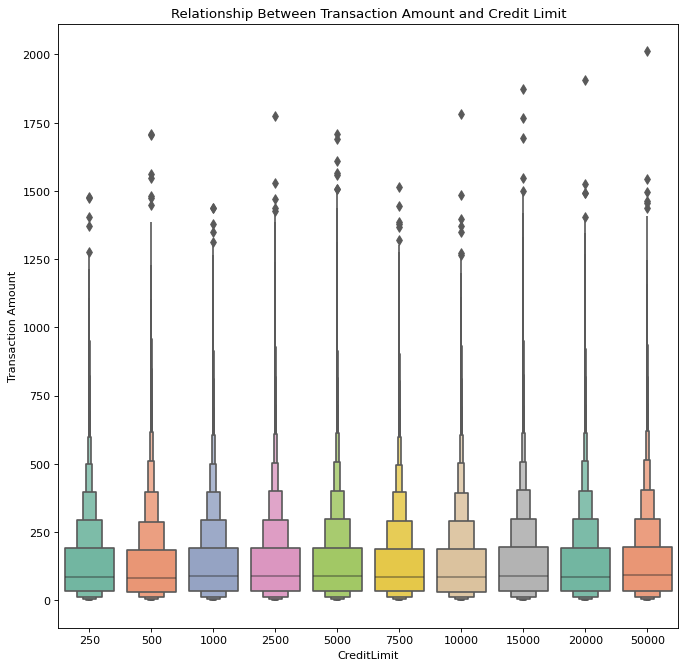

In [19]:
plt.figure(figsize=(10,10), dpi= 80)
sns.boxenplot(data=df, x='creditLimit', y='transactionAmount', palette='Set2')
plt.title('Relationship Between Transaction Amount and Credit Limit')
plt.xlabel('CreditLimit')
plt.ylabel('Transaction Amount')

* I looks like people with low credit limit spend as much money as people with high limit.

* 

**Transaction Amount and Current Balance**


Text(0, 0.5, 'Transaction Amount')

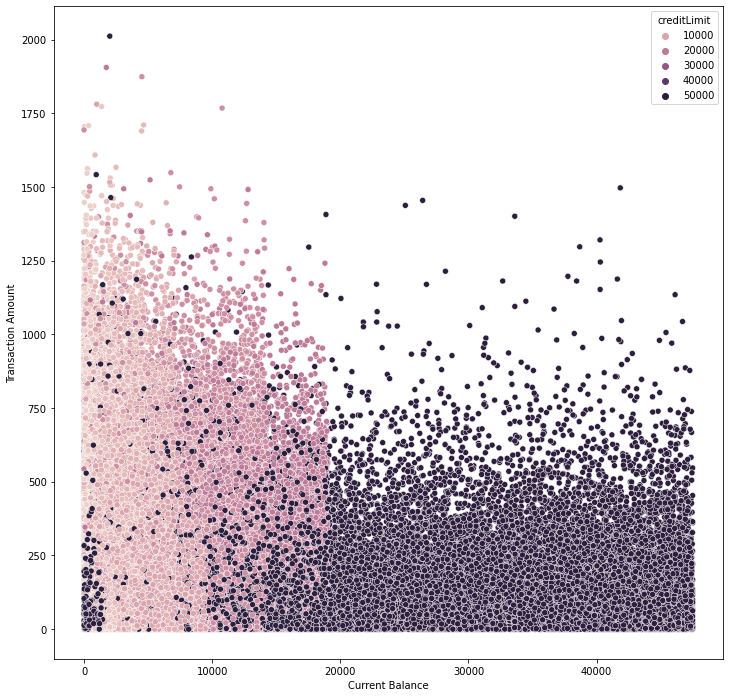

In [20]:
# similar though but the implementation was referred.
#directly referred from the link, thanks to jbofill10

plt.figure(figsize=(12,12))
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit')
plt.xlabel('Current Balance')
plt.ylabel('Transaction Amount')

* If we look carefully we can divide thr current balance in two ranges
    
    1. 0- 20,000 $:
      
      In this range we can see mean transasction amount or most of the people have transaction value of $1000.

    2. 20,000$ - $40,000:

      In this range we can see mean transasction amount or most of the people have transaction value of $500.

* It is suprising to see people with high current balance which can afford to spend more money spent it sparingly.
      

**Number of Fraud transaction and Valid transactions**

False    773946
True      12417
Name: isFraud, dtype: int64

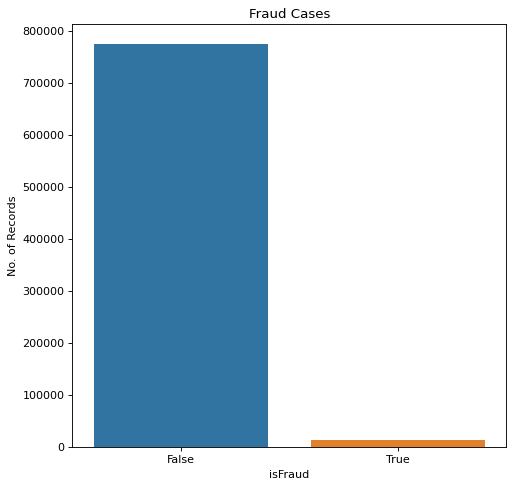

In [21]:
# plotting graph
plt.figure(figsize=(7,7), dpi= 80)
sns.countplot(data=df, x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('No. of Records')
plt.title('Fraud Cases')

#counting the value
df['isFraud'].value_counts()

* Most of the transactions recorded are Valid.
* Very few transactions are recorded fruad.

**Relationship between Card Present and Fraudulent Transactions**

Text(0.5, 1.0, 'Relationship between Card Present and Fraudulent Transactions')

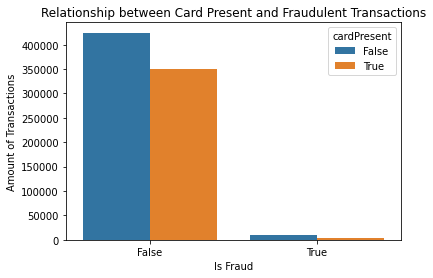

In [22]:
sns.countplot(data=df, x='isFraud', hue='cardPresent')
plt.xlabel('Is Fraud')
plt.ylabel('Amount of Transactions')
plt.title('Relationship between Card Present and Fraudulent Transactions')

**Seperating data to plot**

In [23]:
fraud = df[df.isFraud == 1]
most_fraud_account = fraud['accountNumber'].value_counts().head(20)


**Plotting graph for top 20 fraud transaction accounts**

Text(0.5, 1.0, 'Top 20 Accounts with the Most Fraud Transactions')

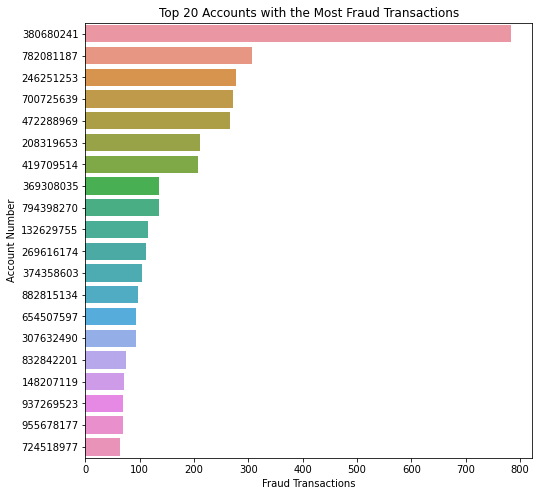

In [24]:
#directly referred from the link, thanks to jbofill10

plt.figure(figsize=(8,8))

sns.barplot(y=list(range(20)), x=most_fraud_account.values, orient='h')
plt.yticks(ticks=list(range(20)), labels=most_fraud_account.index.tolist())
plt.ylabel('Account Number')
plt.xlabel('Fraud Transactions')
plt.title('Top 20 Accounts with the Most Fraud Transactions')

Text(0.5, 1.0, 'Most Popular Merchants of Account 380680241')

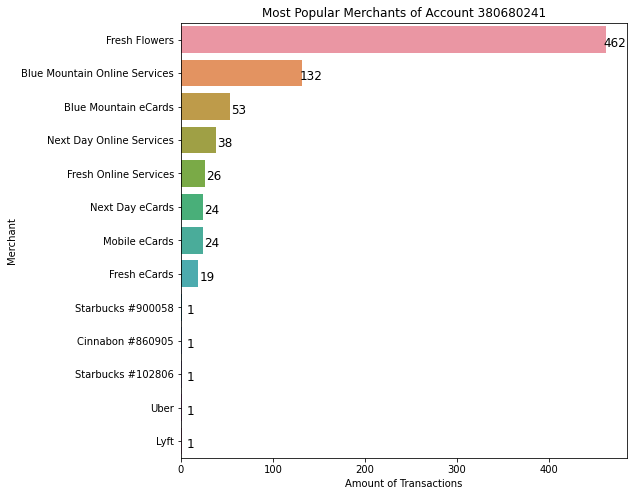

In [25]:
#directly referred from the link, thanks to jbofill10

plt.figure(figsize=(8,8))

fraud_king = most_fraud_account.index[0]
fraud_king_data = df[(df['accountNumber'] == fraud_king) & (df['isFraud'] == True)]
fraud_king_top_merchants = fraud_king_data['merchantName'].value_counts()

ax = sns.barplot(y=list(range(len(fraud_king_top_merchants))), x=fraud_king_top_merchants.values, orient='h')
for p in ax.patches:
    width = p.get_width()
    ax.text(width+9.5  ,
        p.get_y()+p.get_height()/2. + 0.2,
        int(width),
        ha="center", fontsize=12)

plt.yticks(ticks=list(range(len(fraud_king_top_merchants))), labels=fraud_king_top_merchants.index.tolist())
plt.xlabel('Amount of Transactions')
plt.ylabel('Merchant')
plt.title('Most Popular Merchants of Account 380680241')